# Deep Learning Fundamentals - LU03-A Lab Exercise

## 3.1 Data Preparation

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

---
Import MNIST data.

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(train_labels)

[5 0 4 ... 5 6 8]


Display the shape of data

In [3]:
print("Train images shape: {}".format(train_images.shape))
print("Train labels shape: {}".format(train_labels.shape))
print("Test images shape: {}".format(test_images.shape))
print("Test labels shape: {}".format(test_labels.shape))

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


## 3.2 Display some of the images from the MNIST dataset

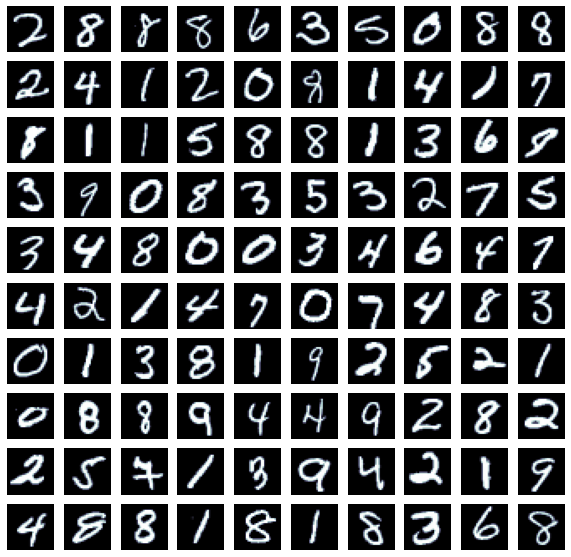

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import random


# >>>> this section of code will start with a random value and retrieve continuous of 100 images
#starting = random.randint(0, 59900)
#pos = 1
#for i in range(starting, starting+100):
#    tmp_img = train_images[i]
#    plt.subplot(10,10,pos)
#    pos += 1
#    plt.imshow(tmp_img, cmap= 'gray')
#plt.xlabel("Image id "+str(starting)+" to "+str(starting+100))
# <<<<<<<<<<<<<<<<<<<<<<<<<

# >>>>>>>>> below is an example of randmoize display of images out of the 60000 training images
i, pos = 0, 1
trgSize = len(train_images)
plt.figure(figsize=(10, 10))
for i in range(0, 100):
    rnd = random.randint(0, trgSize)
    tmp_img = train_images[rnd]
    
    #subplot params: 3-digit integer or three separate integers describing the position of the subplot.
    #nrows, ncols, and index in order, the subplot will take the index position on a grid with 
    #nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right.
    plt.subplot(10,10,pos)
    pos += 1
    plt.imshow(tmp_img, cmap= 'bone')
    plt.axis('off')
# <<<<<<<<<<<<<< ends here
plt.show()

## 3.3 Display some images with labels

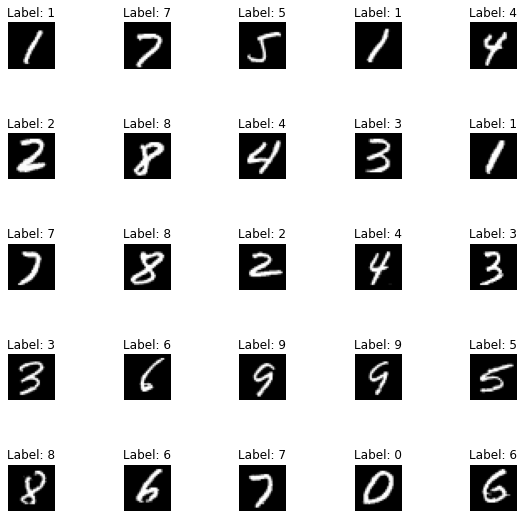

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

pos = 1
starting = random.randint(0, 59975)
plt.figure(figsize=(10, 10))
for i in range(starting, starting+25):
    tmp_img = train_images[i]
    ax = plt.subplot(5*2,5,pos)
    
    if pos%5 == 0:
        pos += 6
    else:
        pos += 1
        
    ax.imshow(tmp_img, cmap= 'gray')
    ax.axis('off')
    ax.set_title("Label: "+str(train_labels[i]))
    ax.label_outer()
    
plt.xlabel("Image id "+str(starting)+" to "+str(starting+25))
plt.show()

## 3.4 Process the images and labels

In [6]:
from keras.utils.np_utils import to_categorical

# Flatten the image
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))


# One-hot Encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("Train images shape: {}".format(train_images.shape))
print("Train labels shape: {}".format(train_labels.shape))
print("Test images shape: {}".format(test_images.shape))
print("Test labels shape: {}".format(test_labels.shape))

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)


## 3.5 Save the processed MNIST data for later use

In [7]:
import pickle

data = [train_images, train_labels, test_images, test_labels]

# Save in local drive
with open('MNIST_data.pickle', 'wb+') as out_file:
    pickle.dump(data, out_file)